In [1]:
import uproot 
import numpy as np
import matplotlib.pyplot as plt

from helper_rocs import *

%load_ext autoreload
%autoreload 2

In [2]:
# performance of the tagger in my manual FCCAnalyses implementation
path1 = "/afs/cern.ch/work/s/saaumill/public/analyses/Hgamma-FCCee/outputs/jettags/Hgamma/p8_ee_Hgamma_ecm240_jetbased.root"
data1 = load_data(path1, key='tree;1')

Time to load data: 0.04049110412597656


In [ ]:
def disc(data1, dic, label1, dicx=None, save=False, name=None, lax=0):
    fig, ax = plt.subplots(2, 2, figsize=(12, 7), constrained_layout=True)
    ax = ax.flat

    label_to_int, int_to_label = create_label_mapping()

    color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
    dic_c = {0: color_cycle[0], 2: color_cycle[1], 3: color_cycle[4], 4: color_cycle[3], 5: color_cycle[2]}
    ls = ["solid", "dashed"]

    for d, data in enumerate([data1]):
        y_true, y_score = get_y_true_and_score(data)
        y_score = change_ud_to_l(y_score, y_true, True) # average ud to light

        for a, quark in enumerate(dic.keys()):
            # plot
            int_quark = label_to_int[quark]
            y_score_MC_b = y_score[np.where(y_true==int_quark)] # shape (x, 7)
            q_int = [label_to_int[q] for q in dic[quark]]

            for l, i in enumerate(q_int):
                score = y_score_MC_b[:, i]
                lab = None
                r = None
                hist_val = np.log10(score/(1 - score))
                if dicx:
                    r = dicx[quark]
                    if r:
                        hist_val = np.clip(hist_val, *r)
                if d==0:
                    lab = dic[quark][l]
                ax[a].hist(hist_val, histtype='step', linewidth=2.0, density=True, bins=60, label=lab, color=dic_c[i], linestyle=ls[d], range=r)
                ax[a].grid(True)
                ax[a].legend()
                ax[a].set_xlabel(r"${}$-jet discriminant".format(quark))

    # legends ...
    handles_colorful, labels_colorful = ax[lax].get_legend_handles_labels()
    legend_colorful = ax[lax].legend(handles=handles_colorful) #, title=f"{labels[4]}-tagging", title_fontproperties={'weight':'bold'})
    # Create black lines for FullSim and FastSim
    fullsim_line = Line2D([0], [0], color='black', linestyle='-', label=label1)
    # Add the second legend for FullSim and FastSim
    legend_sim = ax[lax].legend(handles=[fullsim_line], loc="upper left")#, bbox_to_anchor=(0.6, 1.0))
    # reset colorful legend
    ax[lax].add_artist(legend_colorful)
    if save:
        plt.savefig("test.pdf".format(name))
    else:
        plt.show()

quark b
q_int [2, 4, 5]
quark c
q_int [2, 4, 5]
quark s
q_int [0, 5, 3]
quark g
q_int [0, 4, 5]


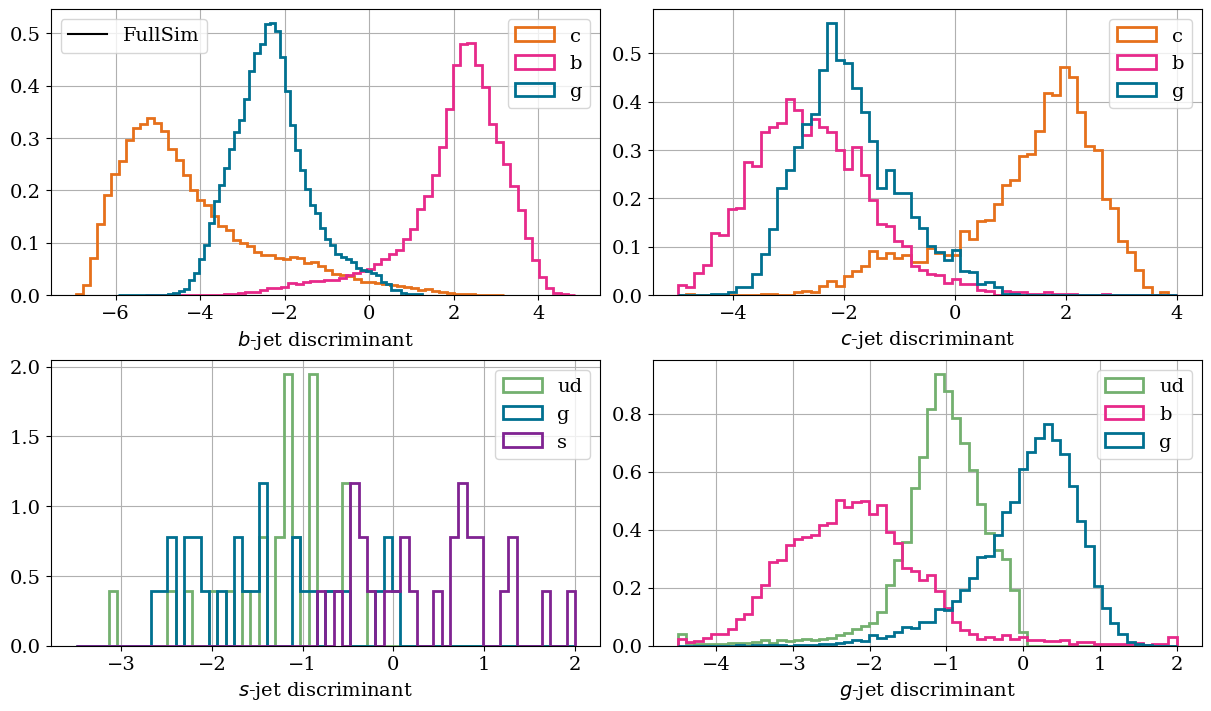

In [14]:
dic_xlim = {"b": None, "c": [-5, 4], "s": [-3.5, 2], "g": [-4.5, 2]}
dic_non_bi = {"b": ["c", "b", "g"], "c": ["c", "b", "g"], "s": ["ud", "g", "s"], "g": ["ud", "b", "g"]}
# dic_non_bi = {"b": ["c", "b", "g"]}
disc(data1, dic_non_bi, "FullSim", dicx=dic_xlim, save=True, name="Hgamma-240-non-binary")

Try to make only b-jet discriminant but for different data in one plot

In [23]:
def plot_bjet_disc():
    fig, ax = plt.subplots(1, 1, figsize=(7, 5), constrained_layout=True)

    bjet_disc(data1, ax)

    ax.grid(True)
    ax.legend()
    ax.set_xlabel(r"$b$-jet discriminant")


    plt.savefig("test.pdf")


def bjet_disc(data, ax):
    y_true, y_score = get_y_true_and_score(data)

    scores_interest = ["b", "c", "g"]
    label_to_int, int_to_label = create_label_mapping()

    color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
    dic_c = {0: color_cycle[0], 2: color_cycle[1], 3: color_cycle[4], 4: color_cycle[3], 5: color_cycle[2]}

    quark = "b"

    int_quark = label_to_int[quark] # 4
    y_score_MC_b = y_score[np.where(y_true==int_quark)] # shape (x, 7)
    q_int = [label_to_int[q] for q in scores_interest]

    for l, i in enumerate(q_int):
        score = y_score_MC_b[:, i]
        hist_val = np.log10(score/(1 - score))
        ax.hist(hist_val, histtype='step', linewidth=2.0, density=True, bins=60, label=scores_interest[l], color=dic_c[i])



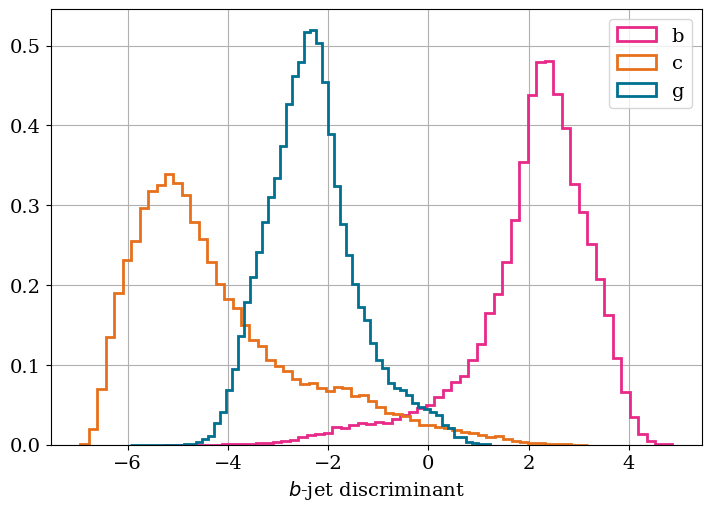

In [24]:
plot_bjet_disc()